# 🚗 CO₂ Emission Prediction with Linear Regression
This notebook demonstrates data preprocessing, model training, and evaluation for predicting vehicle CO₂ emissions using linear regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("./CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Drop unnecessary columns
features = df.drop(columns=["Model", "CO2 Emissions(g/km)","Make", "Vehicle Class",])
target = df["CO2 Emissions(g/km)"]

# Categorical and numerical columns
categorical_cols = [ "Transmission", "Fuel Type"]
numerical_cols = features.drop(columns=categorical_cols).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder='passthrough')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [6]:
Lregression=LinearRegression()

In [7]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Lregression)
])
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = pipeline.predict(X_test)

print("R2 Score (Train):", pipeline.score(X_train, y_train))
print("R2 Score (Test):", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score (Train): 0.9931931357255536
R2 Score (Test): 0.9920806985198836
MAE: 3.1009605943388086
MSE: 27.23944647496491


Mean absolute error 3.1009605943388086
R2 Score 0.9920806985198836


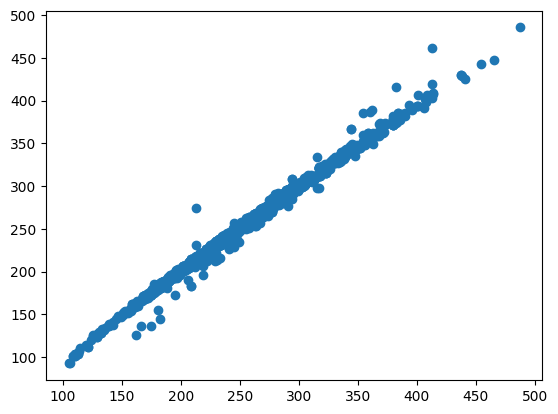

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
ridge=Ridge()

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", ridge)
])
pipeline.fit(X_train, y_train)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Pickling


In [11]:
import pickle
pickle.dump(pipeline, open('model.pkl', 'wb'))

ANALYSIS

In [12]:
##Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

27.23944647496491
3.1009605943388086
5.219142312196987


In [13]:
#R square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9920806985198836


In [14]:
#Adjusted r square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9920375415635887

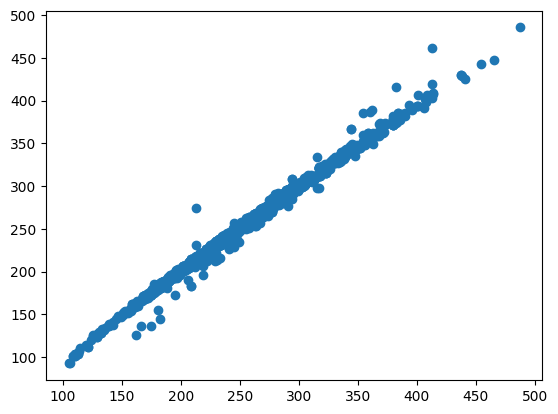

In [15]:
plt.scatter(y_test,y_pred)

7261   -1.219493
4489    3.616106
1539   -3.793512
3532    0.300911
6418    2.081453
          ...   
7185   -0.694687
1740   -2.357676
4609    1.443155
1844   -3.999656
5154    0.526180
Name: CO2 Emissions(g/km), Length: 1477, dtype: float64


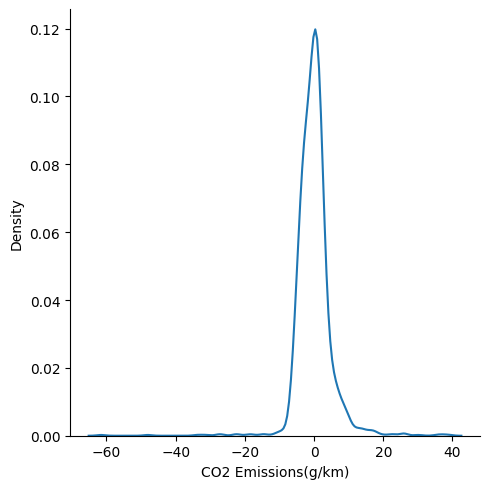

In [16]:
import seaborn as sns
residuals=y_test-y_pred
print(residuals)
#plot residuals
sns.displot(residuals,kind='kde')

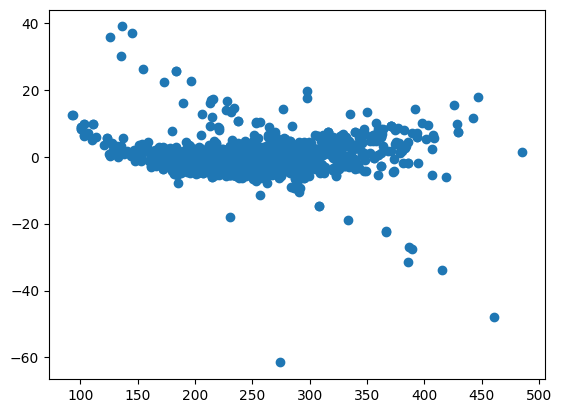

In [17]:
#scatter plot wrt prediction and residuals
plt.scatter(y_pred,residuals)